In [4287]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [4288]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

In [4289]:
from keras.models import Sequential
from keras.layers import Dense

In [4290]:
df=pd.read_csv(r'IKEA.csv')

In [4291]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [4292]:
df.isna().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [4293]:
df[['width', 'height', 'depth']] = df.groupby(['category'])['width', 'height', 'depth'].transform(lambda x: x.fillna(x.mean()))

C:\Users\ydg88\AppData\Local\Temp\ipykernel_5572\1058220307.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[['width', 'height', 'depth']] = df.groupby(['category'])['width', 'height', 'depth'].transform(lambda x: x.fillna(x.mean()))


In [4294]:
df.isna().sum()

Unnamed: 0           0
item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
dtype: int64

In [4295]:
df['volume']=df.width*df.height*df.depth
cols = ['item_id','link', 'short_description','Unnamed: 0','width','height','depth','name']
df=df.drop(cols, axis = 1)
print(df.shape)

(3694, 7)


In [4296]:
df.shape

(3694, 7)

In [4297]:

old_price_list=[]
for i in df.old_price:
    old_price_list.append(i)
for i in df['old_price']:
    if i != 'No old price':
        df.old_price.replace(i,"yes old price",inplace=True)
print(df.old_price.unique())

['No old price' 'yes old price']


No old price     0.822956
yes old price    0.177044
Name: old_price, dtype: float64


([<matplotlib.patches.Wedge at 0x21945770130>,
 [Text(-0.9341944350323816, 0.5807587774235784, 'No old price'),
  Text(0.9341944350323818, -0.5807587774235781, 'yes old price')])

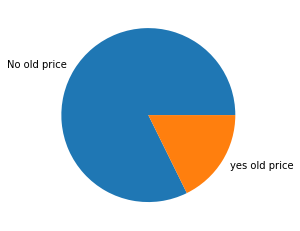

In [4298]:
'''plt.pie(df.old_price.value_counts(), labels=df.old_price.unique(), autopct='%1.1f%%')
plt.title('old price frequency')
plt.axis('equal')
plt.show()'''
old_price_per = df.old_price.value_counts()/ df.old_price.value_counts().sum()
print(old_price_per)
plt.pie(old_price_per, labels =old_price_per.keys())

C:\Users\ydg88\AppData\Local\Temp\ipykernel_5572\3000640325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.old_price[df.old_price != 'No old price'] = 'Yes old price'


(array([0, 1]), [Text(0, 0, 'No old price'), Text(1, 0, 'Yes old price')])

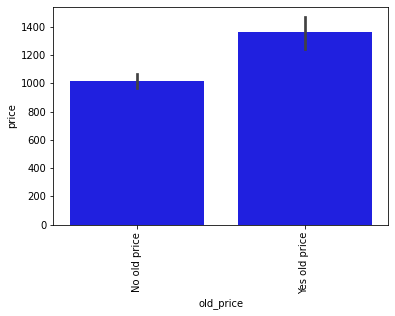

In [4299]:
plt.figure(figsize=[6, 4])
df.old_price[df.old_price != 'No old price'] = 'Yes old price'
sns.barplot(data=df, y='price', x='old_price', color='blue')
plt.xticks(rotation=90)

In [4300]:
'''d = {'col1': ['Y','N','Y','N'], 'col2': [2,3, 4,1]}
df2 = pd.DataFrame(data=d)

sns.barplot(data=df2, y='col2', x='col1', color='blue')
plt.xticks(rotation=90)
'''

"d = {'col1': ['Y','N','Y','N'], 'col2': [2,3, 4,1]}\ndf2 = pd.DataFrame(data=d)\n\nsns.barplot(data=df2, y='col2', x='col1', color='blue')\nplt.xticks(rotation=90)\n"

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bar furniture'),
  Text(1, 0, 'Beds'),
  Text(2, 0, 'Bookcases & shelving units'),
  Text(3, 0, 'Cabinets & cupboards'),
  Text(4, 0, 'Café furniture'),
  Text(5, 0, 'Chairs'),
  Text(6, 0, 'Chests of drawers & drawer units'),
  Text(7, 0, "Children's furniture"),
  Text(8, 0, 'Nursery furniture'),
  Text(9, 0, 'Outdoor furniture'),
  Text(10, 0, 'Room dividers'),
  Text(11, 0, 'Sideboards, buffets & console tables'),
  Text(12, 0, 'Sofas & armchairs'),
  Text(13, 0, 'Tables & desks'),
  Text(14, 0, 'Trolleys'),
  Text(15, 0, 'TV & media furniture'),
  Text(16, 0, 'Wardrobes')])

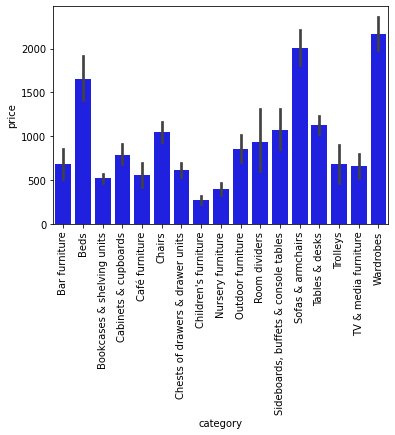

In [4301]:
plt.figure(figsize=[6, 4])
sns.barplot(data=df, y='price', x='category', color='blue')
plt.xticks(rotation=90)

Tables & desks                          0.165674
Bookcases & shelving units              0.148349
Chairs                                  0.130211
Sofas & armchairs                       0.115864
Cabinets & cupboards                    0.079047
Wardrobes                               0.063887
Outdoor furniture                       0.058473
Beds                                    0.056308
TV & media furniture                    0.051435
Chests of drawers & drawer units        0.033839
Children's furniture                    0.033568
Nursery furniture                       0.026259
Bar furniture                           0.012723
Trolleys                                0.007580
Café furniture                          0.007038
Sideboards, buffets & console tables    0.006226
Room dividers                           0.003519
Name: category, dtype: float64


([<matplotlib.patches.Wedge at 0x2194589d840>,
 [Text(0.9543384098065464, 0.5470266899959385, 'Tables & desks'),
  Text(0.0701152724657077, 1.0977631113163986, 'Bookcases & shelving units'),
  Text(-0.7977293222718355, 0.7573822868193567, 'Chairs'),
  Text(-1.0998981637597716, -0.014967610292995898, 'Sofas & armchairs'),
  Text(-0.8914558122763225, -0.6444428095329812, 'Cabinets & cupboards'),
  Text(-0.5233255770287316, -0.9675382888689963, 'Wardrobes'),
  Text(-0.12229762452287744, -1.0931803561334523, 'Outdoor furniture'),
  Text(0.27127487824303176, -1.0660253000910571, 'Beds'),
  Text(0.609862704101056, -0.9154602570000229, 'TV & media furniture'),
  Text(0.8304328224454357, -0.7213746096206239, 'Chests of drawers & drawer units'),
  Text(0.9635043791033355, -0.5307158481227937, "Children's furniture"),
  Text(1.0456986642594097, -0.34134191592314944, 'Nursery furniture'),
  Text(1.0795651685429195, -0.21104276075927797, 'Bar furniture'),
  Text(1.0908219399462884, -0.141800900320

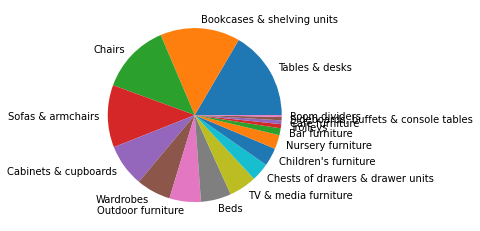

In [4302]:
cat_per = df.category.value_counts() / df.category.value_counts().sum()
print(cat_per)
plt.pie(cat_per, labels = cat_per.keys())


In [4303]:
pd.options.display.min_rows=1000
((df.designer.value_counts()))

IKEA of Sweden                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [4304]:
des_per= df.designer.value_counts()/df.designer.value_counts().sum()
print(des_per)

IKEA of Sweden                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [4305]:
klist= []
k=0
for i in df['designer']:
    if ("Ehlén Johansson") in i:
        df.designer.replace(i,"Ehlén Johansson",inplace=True)
    if ('Jon Karlsson' in i) or ('J Karlsson' in i):
        df.designer.replace(i,'Jon Karlsson', inplace=True)    
    if ('Ebba Strandmark') in i:
        df.designer.replace(i,'Ebba Strandmark', inplace=True)
    if ('Eva Lilja Löwenhielm') in i:
        df.designer.replace(i,'Eva Lilja Löwenhielm', inplace=True)
    if len(i.split()) > 10:
        df.designer.replace(i,'unknown', inplace=True)
        
        
#print(klist[-1])
#df['designer'] = df['designer'].replace(['old value'],'new value')

In [4306]:
#pd.options.display.min_rows=1000
#print((df.designer.value_counts()))
#print((df.designer.unique()))
values = df['designer'].value_counts(dropna=False).keys().tolist()
counts = df['designer'].value_counts(dropna=False).tolist()
print(values)
print(counts)
print(len(counts))

['IKEA of Sweden', 'Ehlén Johansson', 'Jon Karlsson', 'Francis Cayouette', 'unknown', 'Ola Wihlborg', 'K Hagberg/M Hagberg', 'Ebba Strandmark', 'Eva Lilja Löwenhielm', 'Carina Bengs', 'Henrik Preutz', 'Studio Copenhagen', 'H Preutz/A Fredriksson', 'K Malmvall/E Lilja Löwenhielm', 'Nike Karlsson', 'Tord Björklund', 'Johan Kroon', 'Carl Öjerstam', 'Marcus Arvonen', 'Mia Lagerman', 'David Wahl', 'Andreas Fredriksson', 'M Kjelstrup/A Östgaard', 'Maja Ganszyniec', 'Tom Dixon', 'Gillis Lundgren', 'Tina Christensen', 'Ola Wihlborg/IKEA of Sweden', 'IKEA of Sweden/Marcus Arvonen', 'Noboru Nakamura', 'S Fager/J Jelinek', 'Marcus Arvonen/IKEA of Sweden', 'K Hagberg/M Hagberg/IKEA of Sweden', 'Sarah Fager', 'IKEA of Sweden/Ola Wihlborg', 'John/Jonas/Petrus/Paul/Caroline', 'J Fritzdorf/J Feldman/J Hedberg', 'Tord Björklund/IKEA of Sweden', 'IKEA of Sweden/Gillis Lundgren', 'IKEA of Sweden/Tord Björklund', 'Nicholai Wiig Hansen', 'J Löfgren/J Pettersson', 'Jonas Hultqvist', 'IKEA of Sweden/Henrik P

In [4307]:
k=-1
klist= []
for i in df['designer']:
    k+=1
    if ("IKEA of Sweden") in i:
        klist.append(k)
        #df.designer.replace(i,"IKEA of Sweden",inplace=True)
'''print(klist)
for i in klist:
    if counts[i] <4:'''
      

'print(klist)\nfor i in klist:\n    if counts[i] <4:'

In [4308]:
for i in df['designer']:
    if ("IKEA of Sweden") in i and ((df['designer'].values == i).sum() ) < 17:
        df.designer.replace(i,"IKEA of Sweden",inplace=True)
    if '704.510.65' in i:
        df.designer.replace(i, 'unknown',inplace=True)
    if '401.483.68' in i:
        df.designer.replace(i, 'unknown', inplace=True)
    if '304.510.67' in i:
        df.designer.replace(i, 'unknown', inplace=True)
    if 'Malmvall' in i:
        df.designer.replace(i, 'Malvall', inplace=True)
    if 'Wahl' in i:
        df.designer.replace(i, 'David Wahl', inplace=True)
    if 'Fager' in i:
        df.designer.replace(i, 'Sarah Fager', inplace=True)
    if 'Hagberg' in i:
        df.designer.replace(i, 'K Hagberg', inplace=True)
    if 'Caroline' in i:
        df.designer.replace(i, 'Caroline', inplace =True)
    if 'Cayouette' in i:
        df.designer.replace(i, 'Francis Cayouette', inplace=True)
    if 'Nike Karlsson' in i:
        df.designer.replace(i, 'Nike Karlsson', inplace=True)
    if 'Evers' in i:
        df.designer.replace(i, 'Evers', inplace=True)
    if 'A Fredriksson' in i:
        df.designer.replace(i, 'A Fredriksson', inplace=True)
    if 'Arvonen' in i:
        df.designer.replace(i, 'Marcus Arvonen', inplace=True)
    if 'Lagerman' in i:
        df.designer.replace(i, 'Mia Lagerman', inplace=True)
    if 'Carlberg' in i:
        df.designer.replace(i, 'Gustav Carlberg', inplace=True)
    if 'Fredriksson' in i:
        df.designer.replace(i, 'Fredriksson', inplace=True)
    if 'Lanneskog' in i:
        df.designer.replace(i, 'Lanneskog', inplace=True)
    if 'Ola Wihlborg' in i:
        df.designer.replace(i, 'Ola Wihlborg', inplace=True)
    if 'Asshoff' in i:
        df.designer.replace(i, 'J Asshoff', inplace=True)
    if 'Axelsson' in i:
        df.designer.replace(i, 'Axelsson', inplace=True)
    if 'Preutz' in i:
        df.designer.replace(i, 'Preutz', inplace=True)
        
        
    
        
    
        
    
    
    

In [4309]:
values = df['designer'].value_counts(dropna=False).keys().tolist()
counts = df['designer'].value_counts(dropna=False).tolist()
print(values)
print(counts)
print(len(counts))

['IKEA of Sweden', 'Ehlén Johansson', 'Jon Karlsson', 'Francis Cayouette', 'Ola Wihlborg', 'K Hagberg', 'unknown', 'Ebba Strandmark', 'Fredriksson', 'Eva Lilja Löwenhielm', 'Carina Bengs', 'Preutz', 'Studio Copenhagen', 'Nike Karlsson', 'Malvall', 'Marcus Arvonen', 'David Wahl', 'Mia Lagerman', 'Johan Kroon', 'Tord Björklund', 'Sarah Fager', 'Carl Öjerstam', 'Lanneskog', 'M Kjelstrup/A Östgaard', 'Tom Dixon', 'Maja Ganszyniec', 'Gillis Lundgren', 'Tina Christensen', 'Noboru Nakamura', 'Caroline', 'J Asshoff', 'J Fritzdorf/J Feldman/J Hedberg', 'Axelsson', 'J Löfgren/J Pettersson', 'Nicholai Wiig Hansen', 'Jonas Hultqvist', 'Chenyi Ke', 'C Halskov/H Dalsgaard', 'S Holmbäck/U Nordentoft', 'Monika Mulder', 'Evers', 'Lisa Norinder', 'HAY', 'Gustav Carlberg', 'S Edholm/L Ullenius', 'Lisa Hilland', 'Mikael Warnhammar', 'Nada Debs', 'Synnöve Mork', 'Thomas Sandell', 'Virgil Abloh', 'T Christensen/K Legaard', 'Annie Huldén', 'T Winkel/T Jacobsen', 'Chris Martin', 'Maria Vinka', 'Charlie Styrbj

In [4310]:
des_per= df.designer.value_counts()/df.designer.value_counts().sum()
print(des_per)

IKEA of Sweden             0.309421
Ehlén Johansson            0.106659
Jon Karlsson               0.063887
Francis Cayouette          0.045750
Ola Wihlborg               0.042501
K Hagberg                  0.042231
unknown                    0.038711
Ebba Strandmark            0.030319
Fredriksson                0.029507
Eva Lilja Löwenhielm       0.025176
Carina Bengs               0.020303
Preutz                     0.019762
Studio Copenhagen          0.017325
Nike Karlsson              0.016784
Malvall                    0.016243
Marcus Arvonen             0.015160
David Wahl                 0.010287
Mia Lagerman               0.010016
Johan Kroon                0.008392
Tord Björklund             0.008392
Sarah Fager                0.008121
Carl Öjerstam              0.007580
Lanneskog                  0.007580
M Kjelstrup/A Östgaard     0.006226
Tom Dixon                  0.005956
Maja Ganszyniec            0.005956
Gillis Lundgren            0.005956
Tina Christensen           0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]),
 [Text(0, 0, 'Nicholai Wiig Hansen'),
  Text(1, 0, 'Francis Cayouette'),
  Text(2, 0, 'Preutz'),
  Text(3, 0, 'Marcus Arvonen'),
  Text(4, 0, 'Carina Bengs'),
  Text(5, 0, 'K Hagberg'),
  Text(6, 0, 'Sarah Fager'),
  Text(7, 0, 'Ehlén Johansson'),
  Text(8, 0, 'Nike Karlsson'),
  Text(9, 0, 'Maja Ganszyniec'),
  Text(10, 0, 'Malvall'),
  Text(11, 0, 'Caroline'),
  Text(12, 0, 'Jon Karlsson'),
  Text(13, 0, 'IKEA of Sweden'),
  Text(14, 0, 'Ola Wihlborg'),
  Text(15, 0, 'unknown'),
  Text(16, 0, 'Ebba Strandmark'),
  Text(17, 0, 'David Wahl'),
  Text(18, 0, 'Eva Lilja Löwenhielm'),
  Text(19, 0, 'Paulin Machado'),
  Text(20, 0, 'Jonas Hultqvist'),
  Text(

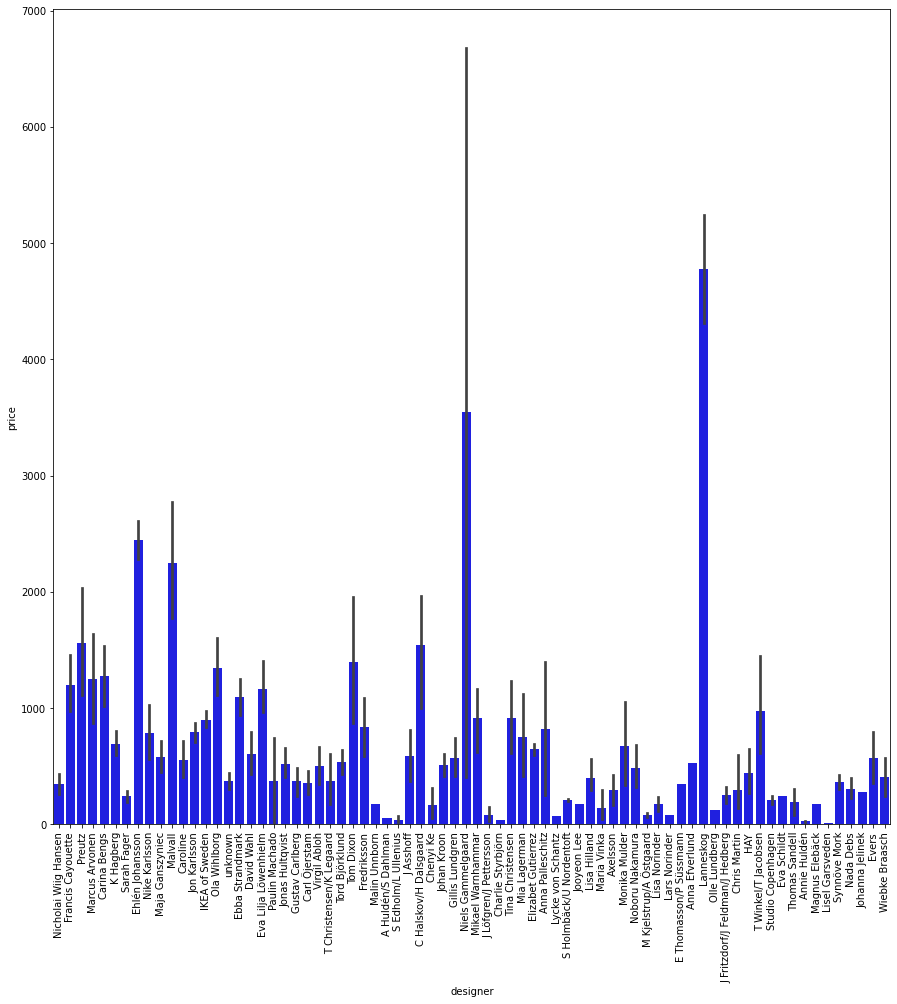

In [4311]:

plt.figure(figsize=[15,15])
sns.barplot(data=df, y='price', x='designer', color='blue')
plt.xticks(rotation=90)

In [4312]:
df.head(50)

,category,price,old_price,sellable_online,other_colors,designer,volume
0,Bar furniture,265.0,No old price,True,No,Nicholai Wiig Hansen,236929.000000
1,Bar furniture,995.0,No old price,False,No,Francis Cayouette,394177.777778
2,Bar furniture,2095.0,No old price,False,No,Francis Cayouette,242419.876877
3,Bar furniture,69.0,No old price,True,Yes,Preutz,300000.000000
4,Bar furniture,225.0,No old price,True,No,Marcus Arvonen,190920.000000
5,Bar furniture,345.0,No old price,True,No,Carina Bengs,163800.000000
6,Bar furniture,129.0,No old price,True,No,K Hagberg,209000.000000
7,Bar furniture,195.0,No old price,True,No,Sarah Fager,243928.571429
8,Bar furniture,129.0,No old price,True,No,K Hagberg,209000.000000
9,Bar furniture,2176.0,Yes old price,True,No,Ehlén Johansson,242419.876877


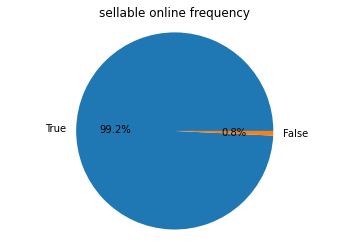

In [4313]:
plt.pie(df.sellable_online.value_counts(), labels=df.sellable_online.unique(), autopct='%1.1f%%')
plt.title('sellable online frequency')
plt.axis('equal')
plt.show()

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

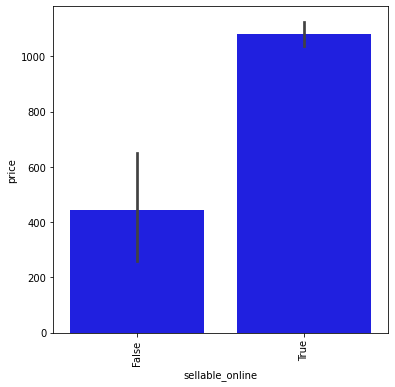

In [4314]:
plt.figure(figsize=[6,6])
sns.barplot(data=df, y='price', x='sellable_online', color='blue')
plt.xticks(rotation=90)

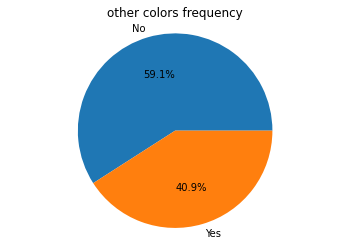

In [4315]:
plt.pie(df.other_colors.value_counts(), labels=df.other_colors.unique(), autopct='%1.1f%%')
plt.title('other colors frequency')
plt.axis('equal')
plt.show()

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

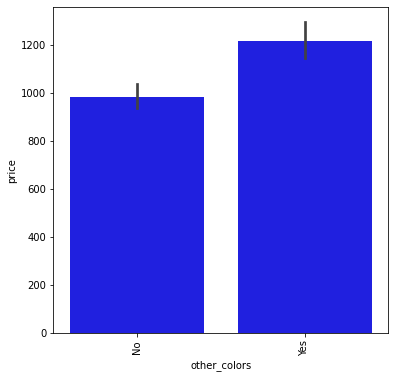

In [4316]:
plt.figure(figsize=[6,6])
sns.barplot(data=df, y='price', x='other_colors', color='blue')
plt.xticks(rotation=90)

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

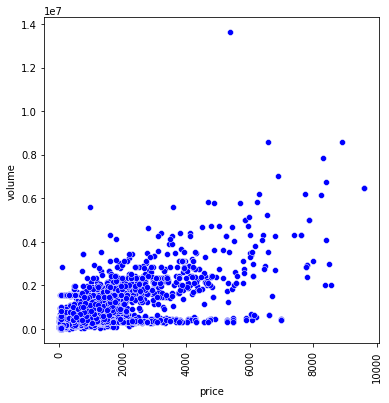

In [4317]:
plt.figure(figsize=[6,6])
sns.scatterplot(data=df, y='volume', x='price', color='blue')
plt.xticks(rotation=90)

In [4318]:
print(max(df.volume))
df.drop(df[df.volume > (max(df.volume)-1)].index, inplace=True)
print(max(df.volume))


13629000.0
8570016.0


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

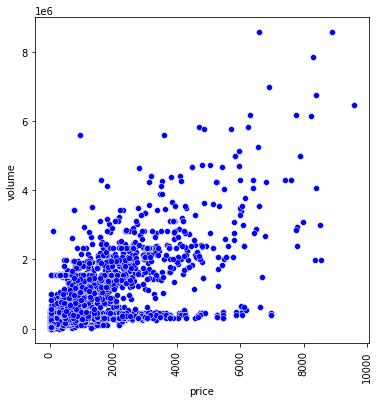

In [4319]:
plt.figure(figsize=[6,6])
sns.scatterplot(data=df, y='volume', x='price', color='blue')
plt.xticks(rotation=90)

In [4320]:
categorical_values=['category','old_price','sellable_online','other_colors','designer']
condition_pivot_list_names=[]
pivot_values_list=[]

for i in categorical_values:
    condition_pivot = df.pivot_table(index=i, values='price', aggfunc=np.mean)
    pivot_names = (condition_pivot.index.values.tolist())
    condition_pivot_list_names.append(pivot_names)
    pivot_values_draft = ((condition_pivot.values.tolist()))
    pivot_values = [i[0] for i in pivot_values_draft]
    pivot_values_list.append(pivot_values)
print(condition_pivot_list_names, 'condition pivot list names')
print(pivot_values_list,'pivot values list')

[['Bar furniture', 'Beds', 'Bookcases & shelving units', 'Cabinets & cupboards', 'Café furniture', 'Chairs', 'Chests of drawers & drawer units', "Children's furniture", 'Nursery furniture', 'Outdoor furniture', 'Room dividers', 'Sideboards, buffets & console tables', 'Sofas & armchairs', 'TV & media furniture', 'Tables & desks', 'Trolleys', 'Wardrobes'], ['No old price', 'Yes old price'], [False, True], ['No', 'Yes'], ['A Huldén/S Dahlman', 'Anna Efverlund', 'Anna Palleschitz', 'Annie Huldén', 'Axelsson', 'C Halskov/H Dalsgaard', 'Carina Bengs', 'Carl Öjerstam', 'Caroline', 'Charlie Styrbjörn', 'Chenyi Ke', 'Chris Martin', 'David Wahl', 'E Thomasson/P Süssmann', 'Ebba Strandmark', 'Ehlén Johansson', 'Elizabet Gutierrez', 'Eva Lilja Löwenhielm', 'Eva Schildt', 'Evers', 'Francis Cayouette', 'Fredriksson', 'Gillis Lundgren', 'Gustav Carlberg', 'HAY', 'IKEA of Sweden', 'J Asshoff', 'J Fritzdorf/J Feldman/J Hedberg', 'J Löfgren/J Pettersson', 'Johan Kroon', 'Johanna Jelinek', 'Jon Karlsson'

In [4321]:
sublist_names=[(sublists) for sublists in condition_pivot_list_names]
print(sublist_names)


sublist_values=[(sublists1) for sublists1 in pivot_values_list]
print(sublist_values)


[['Bar furniture', 'Beds', 'Bookcases & shelving units', 'Cabinets & cupboards', 'Café furniture', 'Chairs', 'Chests of drawers & drawer units', "Children's furniture", 'Nursery furniture', 'Outdoor furniture', 'Room dividers', 'Sideboards, buffets & console tables', 'Sofas & armchairs', 'TV & media furniture', 'Tables & desks', 'Trolleys', 'Wardrobes'], ['No old price', 'Yes old price'], [False, True], ['No', 'Yes'], ['A Huldén/S Dahlman', 'Anna Efverlund', 'Anna Palleschitz', 'Annie Huldén', 'Axelsson', 'C Halskov/H Dalsgaard', 'Carina Bengs', 'Carl Öjerstam', 'Caroline', 'Charlie Styrbjörn', 'Chenyi Ke', 'Chris Martin', 'David Wahl', 'E Thomasson/P Süssmann', 'Ebba Strandmark', 'Ehlén Johansson', 'Elizabet Gutierrez', 'Eva Lilja Löwenhielm', 'Eva Schildt', 'Evers', 'Francis Cayouette', 'Fredriksson', 'Gillis Lundgren', 'Gustav Carlberg', 'HAY', 'IKEA of Sweden', 'J Asshoff', 'J Fritzdorf/J Feldman/J Hedberg', 'J Löfgren/J Pettersson', 'Johan Kroon', 'Johanna Jelinek', 'Jon Karlsson'

In [4322]:
sub_names=[]
sub_values=[]

for i in sublist_names:
    sub_names.extend(i)
print(sub_names,'subnames')

for i in sublist_values:
    sub_values.extend(i)

def myfunc(x):
    if x in sub_names:
        index=sub_names.index(x)
        return sub_values[index]
    return x

for i in categorical_values:
    df[i] = df[i].apply(lambda x: myfunc(x))
    

['Bar furniture', 'Beds', 'Bookcases & shelving units', 'Cabinets & cupboards', 'Café furniture', 'Chairs', 'Chests of drawers & drawer units', "Children's furniture", 'Nursery furniture', 'Outdoor furniture', 'Room dividers', 'Sideboards, buffets & console tables', 'Sofas & armchairs', 'TV & media furniture', 'Tables & desks', 'Trolleys', 'Wardrobes', 'No old price', 'Yes old price', False, True, 'No', 'Yes', 'A Huldén/S Dahlman', 'Anna Efverlund', 'Anna Palleschitz', 'Annie Huldén', 'Axelsson', 'C Halskov/H Dalsgaard', 'Carina Bengs', 'Carl Öjerstam', 'Caroline', 'Charlie Styrbjörn', 'Chenyi Ke', 'Chris Martin', 'David Wahl', 'E Thomasson/P Süssmann', 'Ebba Strandmark', 'Ehlén Johansson', 'Elizabet Gutierrez', 'Eva Lilja Löwenhielm', 'Eva Schildt', 'Evers', 'Francis Cayouette', 'Fredriksson', 'Gillis Lundgren', 'Gustav Carlberg', 'HAY', 'IKEA of Sweden', 'J Asshoff', 'J Fritzdorf/J Feldman/J Hedberg', 'J Löfgren/J Pettersson', 'Johan Kroon', 'Johanna Jelinek', 'Jon Karlsson', 'Jonas 

In [4323]:
df.head(5)

,category,price,old_price,sellable_online,other_colors,designer,volume
0,679.553191,265.0,1016.188549,1081.867913,981.319624,347.727273,236929.000000
1,679.553191,995.0,1016.188549,445.571429,981.319624,1203.049704,394177.777778
2,679.553191,2095.0,1016.188549,445.571429,981.319624,1203.049704,242419.876877
3,679.553191,69.0,1016.188549,1081.867913,1215.121561,1560.772603,300000.000000
4,679.553191,225.0,1016.188549,1081.867913,981.319624,1250.678571,190920.000000


In [4324]:
df.columns

Index(['category', 'price', 'old_price', 'sellable_online', 'other_colors',
       'designer', 'volume'],
      dtype='object')

In [4325]:
df.head(5)

,category,price,old_price,sellable_online,other_colors,designer,volume
0,679.553191,265.0,1016.188549,1081.867913,981.319624,347.727273,236929.000000
1,679.553191,995.0,1016.188549,445.571429,981.319624,1203.049704,394177.777778
2,679.553191,2095.0,1016.188549,445.571429,981.319624,1203.049704,242419.876877
3,679.553191,69.0,1016.188549,1081.867913,1215.121561,1560.772603,300000.000000
4,679.553191,225.0,1016.188549,1081.867913,981.319624,1250.678571,190920.000000


<AxesSubplot:>

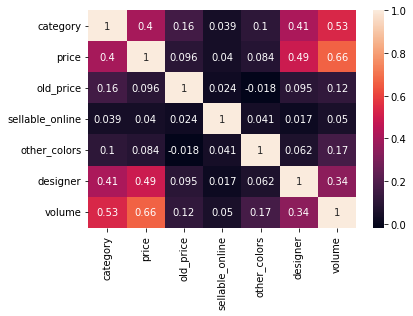

In [4326]:
corr = df.corr()
sns.heatmap(corr, annot = True)

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

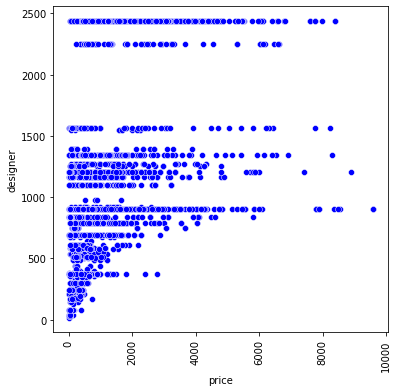

In [4327]:
df.drop(df[df.designer > 3000].index, inplace=True)


plt.figure(figsize=[6,6])
sns.scatterplot(data=df, y='designer', x='price', color='blue')
plt.xticks(rotation=90)

In [4328]:
#dsfdghfd

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

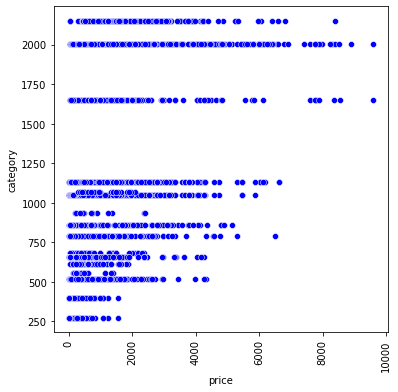

In [4329]:
plt.figure(figsize=[6,6])
sns.scatterplot(data=df, y='category', x='price', color='blue')
plt.xticks(rotation=90)

In [4330]:
df=df.drop(['sellable_online','old_price','other_colors'], axis=1)


In [4331]:
df.head()

,category,price,designer,volume
0,679.553191,265.0,347.727273,236929.000000
1,679.553191,995.0,1203.049704,394177.777778
2,679.553191,2095.0,1203.049704,242419.876877
3,679.553191,69.0,1560.772603,300000.000000
4,679.553191,225.0,1250.678571,190920.000000


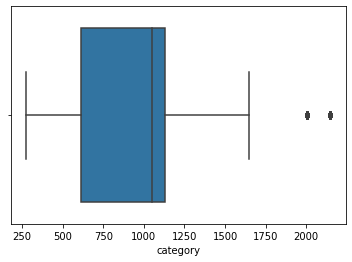

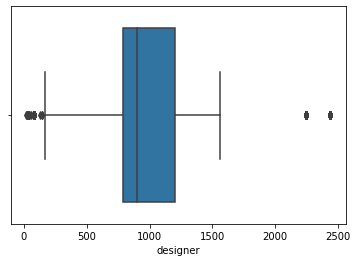

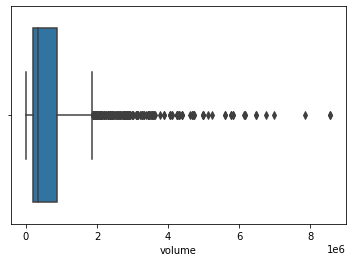

<function matplotlib.pyplot.show(close=None, block=None)>

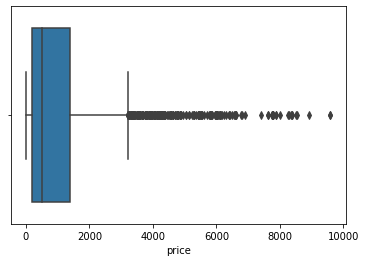

In [4332]:
sns.boxplot(x=df.category)
plt.show()
sns.boxplot(x=df.designer)
plt.show()
sns.boxplot(x=df.volume)
plt.show()
sns.boxplot(x=df.price)
plt.show

In [4333]:
'''df.drop(df[df.category > 1750].index, inplace=True)
df.drop(df[df.designer > 2000].index, inplace=True)
'''

'df.drop(df[df.category > 1750].index, inplace=True)\ndf.drop(df[df.designer > 2000].index, inplace=True)\n'

In [4334]:
print(min(df.price),max(df.price),'price')
print(min(df.category),max(df.category),'category')
print(min(df.volume),max(df.volume),'volume')
print(min(df.designer),max(df.designer),'designer')


3.0 9585.0 price
272.758064516129 2148.4489361702126 category
40.0 8570016.0 volume
16.2 2437.6921119592876 designer


In [4335]:
#df.volume=df.volume/1000

In [4336]:
df.shape

(3663, 4)

In [4337]:
price_list_1=(df.price.to_list())
print(len(price_list_1))

3663


In [4338]:
a=df.columns

In [4339]:
#df.columns=df_cols
x = df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns=a

In [4340]:
df.head()

,category,price,designer,volume
0,0.216877,0.027343,0.136910,0.027642
1,0.216877,0.103527,0.490132,0.045991
2,0.216877,0.218326,0.490132,0.028282
3,0.216877,0.006888,0.637860,0.035001
4,0.216877,0.023168,0.509801,0.022273


In [4341]:
log_price=np.log(df.price)
corr=df.corr()
from scipy import stats
#df1,lambda_1 = stats.boxcox(df)
#df1.price,fitted_lambda = stats.boxcox(df.price)


C:\Users\ydg88\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

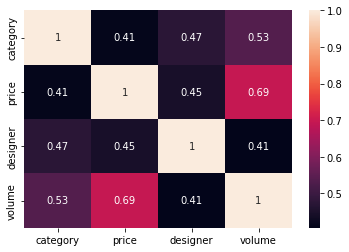

In [4342]:
sns.heatmap(corr, annot = True)

In [4343]:
df.shape

(3663, 4)

In [4344]:


y = (df.price)
X=df.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size=0.25)

"""PREDICT WITH LINEAR REGRESSION AND XGB"""
x_reg=xgb.XGBRegressor(n_estimators=6000, max_depth=3, loss = 'ls', learning_rate = .005)
lr=LinearRegression()

lin_m = lr.fit(X_train, y_train)
xgb_m=x_reg.fit(X_train,y_train)

prediction_Y_train_lin=lin_m.predict(X_train)
prediction_Y_train_xgb=xgb_m.predict(X_train)

prediction_Y_train_lin[prediction_Y_train_lin <= 0] = min(y)
prediction_Y_train_xgb[prediction_Y_train_xgb <= 0] = min(y)


prediction_Y_test_lin=lin_m.predict(X_test)
prediction_Y_test_xgb=xgb_m.predict(X_test)

prediction_Y_test_lin[prediction_Y_test_lin <= 0] = min(y)
prediction_Y_test_xgb[prediction_Y_test_xgb <= 0] = min(y)


score_train_xreg = r2_score(y_train, prediction_Y_train_xgb)  
print(score_train_xreg,'score_train_xreg')
score_test_xreg = r2_score(y_test, prediction_Y_test_xgb)
print(score_test_xreg,'score_test_xreg')
mse_train_xreg = mean_squared_error(y_train, prediction_Y_train_xgb)
print("MSE_train_xreg: %.2f" % mse_train_xreg)
mse_test_xreg = mean_squared_error(y_test, prediction_Y_test_xgb)
print("MSE_test_xreg: %.2f" % mse_test_xreg)


print(r2_score(prediction_Y_train_lin,y_train), 'r2 score linear train')
print(r2_score(prediction_Y_test_lin,y_test), 'r2 score linear test')
print(mean_squared_error(prediction_Y_train_lin,y_train), 'MSE linear train')
print(mean_squared_error(prediction_Y_test_lin,y_test), 'MSE linear test')


C:\Users\ydg88\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:24:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.8097048667649411 score_train_xreg
0.7342043141901946 score_test_xreg
MSE_train_xreg: 0.00
MSE_test_xreg: 0.01
0.0513616426030451 r2 score linear train
0.10619639321172425 r2 score linear test
0.009184707781734495 MSE linear train
0.010065514413247382 MSE linear test


C:\Users\ydg88\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\ydg88\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


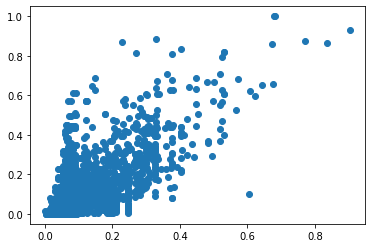

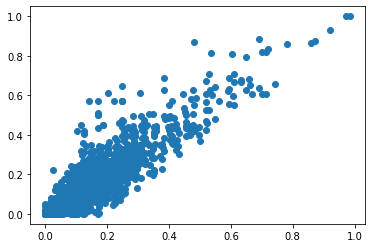

In [4345]:
plt.scatter(prediction_Y_train_lin, y_train)
plt.show()

plt.scatter(prediction_Y_train_xgb, y_train)
plt.show()

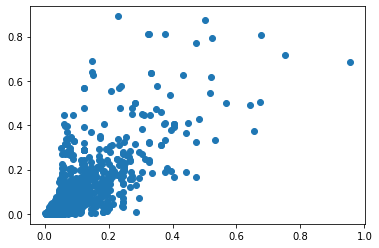

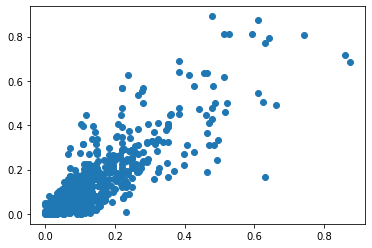

In [4346]:
plt.scatter(prediction_Y_test_lin, y_test)
plt.show()
plt.scatter(prediction_Y_test_xgb, y_test)
plt.show()

In [4347]:
print(min(prediction_Y_test_lin))
print(min(prediction_Y_test_xgb))
print(min(prediction_Y_train_lin))
print(min(prediction_Y_train_xgb))

print(min(y))


0.002204133076612321
0.0
0.0006947691015562465
0.0
0.0


In [4348]:

model = Sequential()
 

model.add(Dense(units=100, input_dim=3, kernel_initializer='normal', activation='relu'))
 
model.add(Dense(units=300, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=300, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=300, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=300, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, kernel_initializer='normal'))
 
model.compile(loss='mean_squared_error', optimizer='adam')

nr_epochs=100

history=model.fit(X_train, y_train ,batch_size = 20, epochs = nr_epochs)


Epoch 1/100
138/138 [==============================] - 2s 8ms/step - loss: 0.0124
Epoch 2/100
138/138 [==============================] - 1s 6ms/step - loss: 0.0091
Epoch 3/100
138/138 [==============================] - 1s 6ms/step - loss: 0.0093
Epoch 4/100
138/138 [==============================] - 1s 5ms/step - loss: 0.0086
Epoch 5/100
138/138 [==============================] - 1s 5ms/step - loss: 0.0083
Epoch 6/100
138/138 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 7/100
138/138 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 8/100
138/138 [==============================] - 1s 6ms/step - loss: 0.0086
Epoch 9/100
138/138 [==============================] - 1s 5ms/step - loss: 0.0082
Epoch 10/100
138/138 [==============================] - 1s 6ms/step - loss: 0.0085
Epoch 11/100
138/138 [==============================] - 1s 6ms/step - loss: 0.0080
Epoch 12/100
138/138 [==============================] - 1s 5ms/step - loss: 0.0079
Epoch 13/100


138/138 [==============================] - 1s 5ms/step - loss: 0.0062
Epoch 100/100
138/138 [==============================] - 1s 5ms/step - loss: 0.0066


dict_keys(['loss'])
[0.012361535802483559, 0.009054545313119888, 0.009324933402240276, 0.008623149245977402, 0.008336660452187061, 0.008689493872225285, 0.008325419388711452, 0.008600723929703236, 0.00823928788304329, 0.008504288271069527, 0.00797790102660656, 0.007918625138700008, 0.008673225529491901, 0.007843035273253918, 0.00788462720811367, 0.007721021771430969, 0.007971333339810371, 0.007509323302656412, 0.007712872698903084, 0.007752640172839165, 0.007749960757791996, 0.007798334117978811, 0.00745781697332859, 0.007727035786956549, 0.007811550982296467, 0.0075852698646485806, 0.007473993115127087, 0.007513340096920729, 0.007737850304692984, 0.007467890623956919, 0.007774821016937494, 0.007470529992133379, 0.00763577688485384, 0.007319314405322075, 0.007395158056169748, 0.007286993321031332, 0.007141639478504658, 0.007682188414037228, 0.0076983338221907616, 0.0071959784254431725, 0.007180819753557444, 0.007350801024585962, 0.007242440711706877, 0.007249109447002411, 0.00731279049

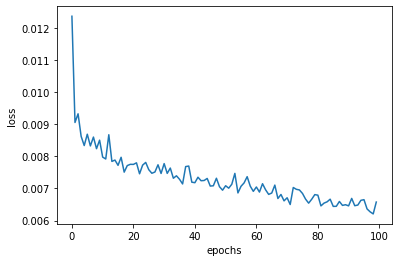

In [4349]:
print(history.history.keys())
print(history.history['loss'])
plt.plot(range(nr_epochs),history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

0.671600144725228
3


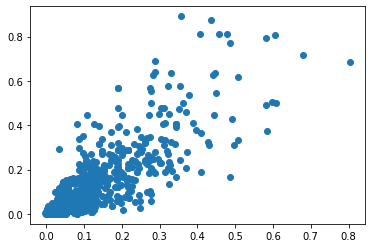

In [4350]:
pred_nn = model.predict([X_test]) 
plt.scatter(pred_nn,y_test)
print(r2_score(y_test,pred_nn))
print(len(df.columns)-1)

In [4351]:
eq=[]
def get_equation(x,y):
    degree = 1
    coefs, res, _,_, _ = np.polyfit(x,y,degree, full = True)
    ffit = np.poly1d(coefs)
    print(ffit)
    return ffit

#print(get_equation(df_or.volume,df_or.price))
pred.clear()

pred=[]
'''for i in df.volume:
    out.append(get_equation(df.volume,df.price)(i))'''

for i in df.volume:
    pred.append((get_equation(df.volume,df.price)(i)) )
print(pred)

 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 

 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 

 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 

 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 

 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 

 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 

 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 0.03117
 
0.9365 x + 

0.010012422396092102
0.4816345635553917


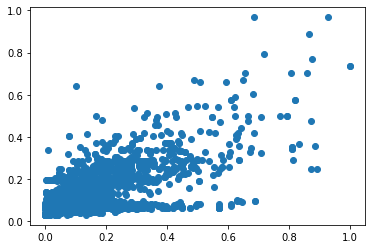

In [4352]:
plt.scatter(df.price,pred)
print(mean_squared_error(df.price,pred))
print(r2_score(df.price,pred))

In [4353]:
xgb_tot=x_reg.fit(X,y)
prediction_Y_xgb_tot=xgb_tot.predict(X)

score_tot_xreg = r2_score(prediction_Y_xgb_tot, y)  
print(score_tot_xreg,'score_tot_xreg')

mse_tot_xreg = mean_squared_error(prediction_Y_xgb_tot, y)
print("MSE_tot_xreg: %.2f" % mse_tot_xreg)

[12:26:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\ydg88\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.736131759213915 score_tot_xreg
MSE_tot_xreg: 0.00


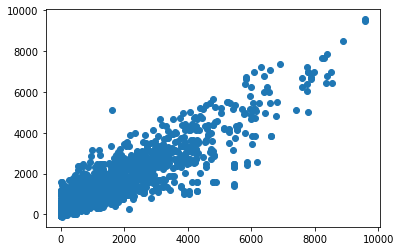

In [4358]:
pr_den=df.price*(max(price_list_1)-min(price_list_1))+min(price_list_1)
pred_pr_den=prediction_Y_xgb_tot*(max(price_list_1)-min(price_list_1))+min(price_list_1)
plt.scatter(pr_den,pred_pr_den)
plt.show()

In [4359]:
print( r2_score(pr_den,pred_pr_den))
print( mean_squared_error(pr_den,pred_pr_den))

0.8092466473301931
338288.8159082995
